# Telecom Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Exploratory Data Analysis

In [2]:
data = pd.read_csv("churn_data.csv")
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From the telecom customer churn dataset, we can get customerID, tenure, PhoneService, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges as independent column. Churn as dependent and targeted column.
We have to find the accuracy percentage because the target column has categorical value and using that we have to predict whether the customer is churn or not.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [4]:
data.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.describe()

,tenure,MonthlyCharges
count,7042.000000,7042.000000
mean,32.366373,64.755886
std,24.557955,30.088238
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [6]:
data['TotalCharges'].str.isspace().sum()    #we are checking is there any whitespace bcz TotalCharges is mentioned as an object

11

In [7]:
data['TotalCharges'].str.isspace().value_counts()

False    7031
True       11
Name: TotalCharges, dtype: int64

In [8]:
data['TotalCharges'].isnull().sum()

0

In [9]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NAN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])    #replacing whitespace with NAN

In [10]:
data['TotalCharges'].isnull().sum()

11

In [11]:
mean_TotalCharges = data['TotalCharges'].mean()          #after that replace that NAN with mean of TotalCharges
mean_TotalCharges

2282.6517138387144

In [12]:
data['TotalCharges'].replace(np.NAN, mean_TotalCharges, inplace=True)

In [13]:
data['TotalCharges'].isnull().sum()

0

In [14]:
data.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Visualization

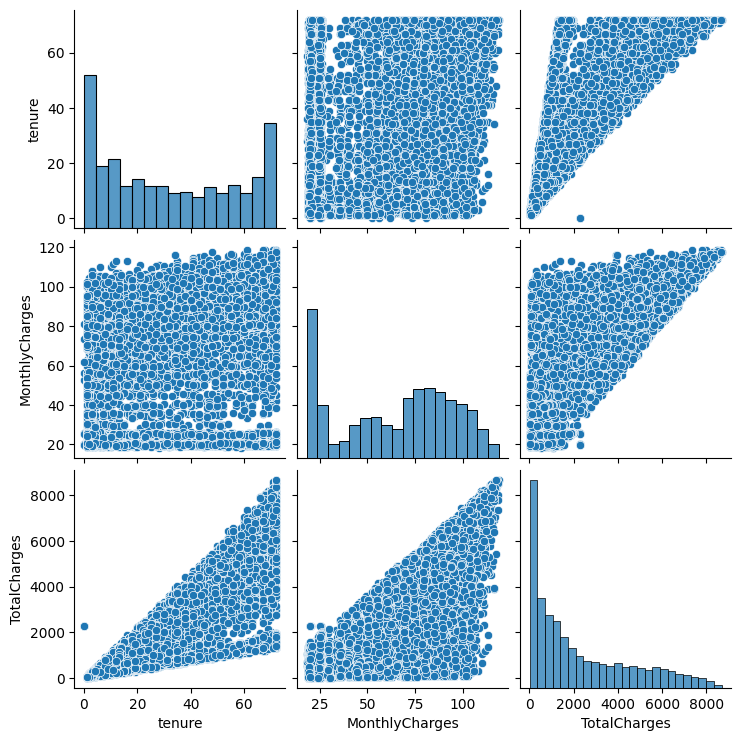

In [15]:
sns.pairplot(data=data)     #data visualization using pairplot

<function matplotlib.pyplot.show(close=None, block=None)>

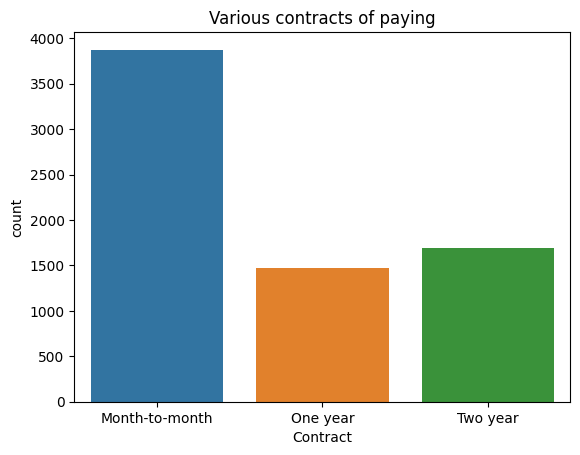

In [16]:
sns.countplot(x = 'Contract', data=data)         #countplot of the column 'Contract'
plt.title('Various contracts of paying')
plt.show

From the above graph, we can conclude that more people are choosing month-to-month payment contract and less people are choosing 1 year payment contract

Text(0.5, 1.0, 'Various methods of paying')

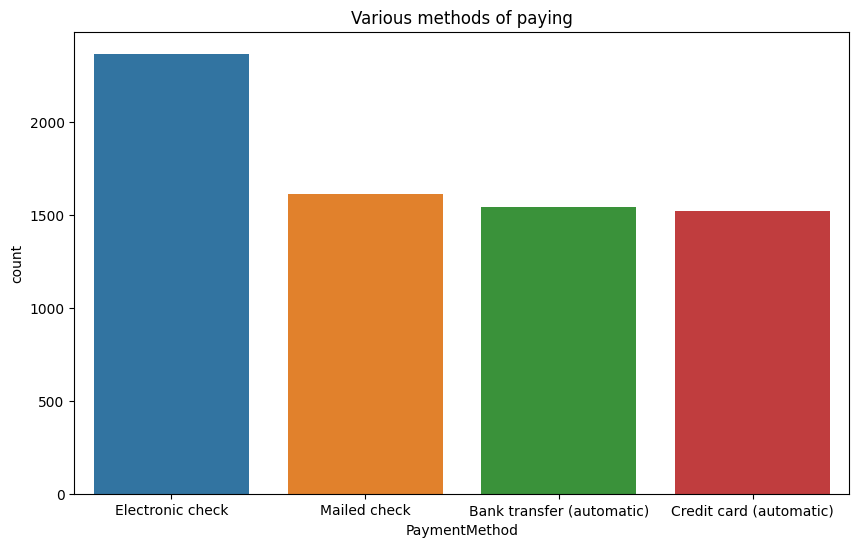

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'PaymentMethod', data=data)    #countplot of the column 'PaymentMethod'
plt.title('Various methods of paying')

From the above graph, we can conclude that more people are choosing Electronic check payment method

Text(0.5, 1.0, 'No. of people churn')

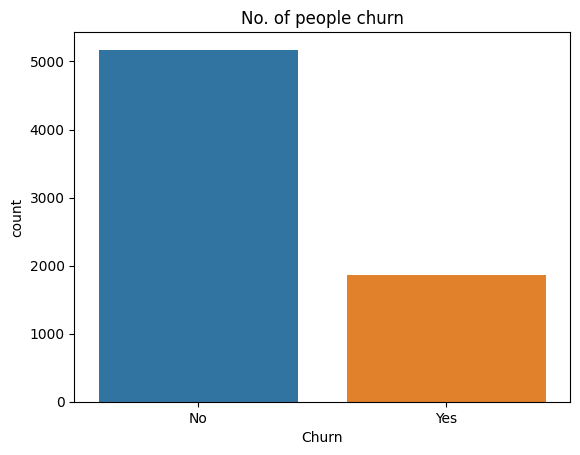

In [18]:
sns.countplot(x = 'Churn', data=data)            #countplot of the column 'Churn'
plt.title('No. of people churn')

From the above graph, we can conclude that less people only churn for telecom

In [19]:
data['Churn'].value_counts()

No     5173
Yes    1869
Name: Churn, dtype: int64

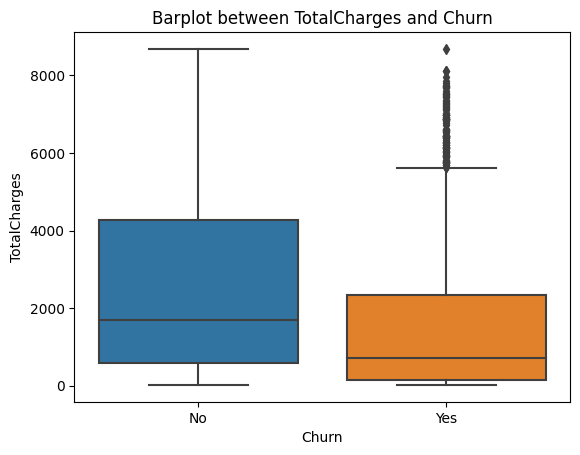

In [20]:
sns.boxplot(data = data, x= "Churn", y="TotalCharges")    #boxplot between churn and totalcharges
plt.title('Barplot between TotalCharges and Churn')
plt.show()

From the above graph, we can conclude that
1. Most people churn when Total charges is less than 2000
2. Most people do not churn when Total charges is above 2000

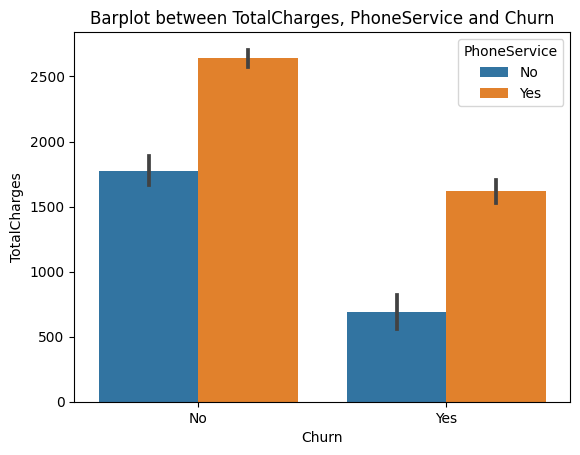

In [21]:
sns.barplot(data = data, x= "Churn", y="TotalCharges", hue = "PhoneService")  #barplot between churn, totalcharges and phoneservices
plt.title('Barplot between TotalCharges, PhoneService and Churn')
plt.show()

From the above graph, we can conclude that
1. Most people do not churn if they have phone sevice and Total charge is above 1800
2. Most people churn if they have Total charge is between 600 to 1600 and inspite of having phone service also

Data Preprocessing

In [22]:
le = LabelEncoder()

label_columns = ['PhoneService','PaperlessBilling', 'Contract', 'PaymentMethod', 'Churn']
for column in label_columns:
    data[column] = le.fit_transform(data[column])

data.head()                                   #Encoding the dataset

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,34,1,1,0,3,56.95,1889.50,0
2,3668-QPYBK,2,1,0,1,3,53.85,108.15,1
3,7795-CFOCW,45,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,2,1,0,1,2,70.70,151.65,1


Train the Dataset

In [23]:
x = data.drop(['Churn','customerID'], axis=1)
y = data['Churn']                    #Assigning x and y variables

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 20)  #spliting the dataset using train and test

In [25]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

Model Development

In [26]:
models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

In [27]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} :- \t Accuracy = {accuracy:.2f}")   #Using various algorithms, the accuracy has been calculated

LogisticRegression() :- 	 Accuracy = 0.81
GaussianNB() :- 	 Accuracy = 0.75
DecisionTreeClassifier() :- 	 Accuracy = 0.74
RandomForestClassifier() :- 	 Accuracy = 0.78
KNeighborsClassifier() :- 	 Accuracy = 0.78


We are choosing the model which gives more accuracy percentage. So we are going with LogisticRegression

In [28]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [29]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1304
           1       0.65      0.54      0.59       457

    accuracy                           0.81      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1169,  135],
       [ 208,  249]])

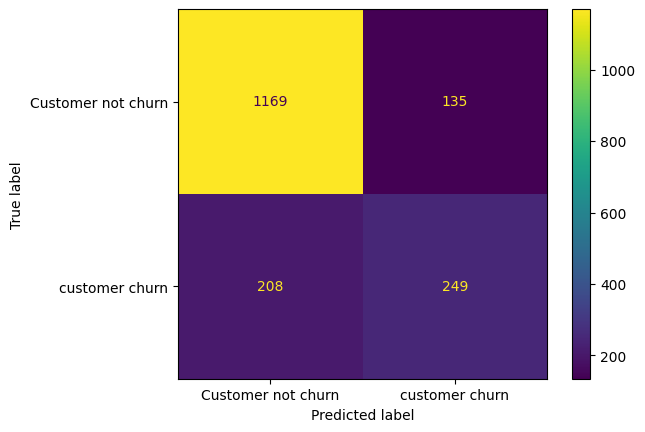

In [31]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['Customer not churn', 'customer churn']).plot()
cmd

From this, we can conclude that the model is able to correctly predict whether a customer will churn or not with an accuracy of 81%